# Importaciones Necesarias

In [ ]:
from google.colab import drive
import zipfile
import os
import numpy as np
import cv2 as cv
from skimage import feature
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.keras as k
import tensorflow as tf
from time import time
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#!pip install visualkeras
import visualkeras


# Extracción y representación de imagenes mediante matrices

In [10]:
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
ruta='/content/drive/MyDrive/Colab Notebooks/Procesamiento Digital De Imagenes/Proyecto3'
ruta_bd=ruta + "/BASE_DATOS.zip"
with zipfile.ZipFile(ruta_bd, 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
class ImageDataProcessor:
    def __init__(self, base_dir):
        self.base_dir = base_dir
        self.classes = os.listdir(base_dir)

    def load_image(self, image_path):
        image = cv.imread(image_path)
       
        if image is None or image.shape == (0, 0):
            raise ValueError(f'Invalid image: {image_path}')

        # Normalización de las imagenes
        image_gaussian = cv.GaussianBlur(image, (3, 3), 0)
        image_resized = cv.resize(image_gaussian, (64, 64), interpolation=cv.INTER_AREA)
        print(image_resized.shape)
        
        return image_resized

    def stack_images(self):
        images_stack = []
        labels = []
        sorted_classes = sorted(self.classes) 
        
        for i, class_name in enumerate(sorted_classes):
            class_dir = os.path.join(self.base_dir, class_name)
            print(f'Processing class: {i} {class_name}')
            
            for image_name in os.listdir(class_dir):
                try:
                    image = self.load_image(os.path.join(class_dir, image_name))
                    images_stack.append(image)
                    labels.append(i)
                except ValueError as e:
                    print(e)
        
        return images_stack, labels

    def save_data(self, data, labels):
        output_dir = os.path.join(ruta + '/BASE_DATOS_CNN')
        os.makedirs(output_dir, exist_ok=True)
        np.save(os.path.join(output_dir, 'vector_x'), data)
        np.save(os.path.join(output_dir, 'vector_y'), labels)

    def process_images(self):
        descriptors, labels = self.stack_images()
        self.save_data(descriptors, labels)
        print('Data saved successfully!')


In [ ]:
if __name__ == '__main__':
    base_dir = '/content/BASE_DATOS'
    data_processor = ImageDataProcessor(base_dir)
    data_processor.process_images()


Processing class: 0 FRESA
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
Processing class: 1 MANGO
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


# **Modelado de los datos**

In [13]:
#cargamos las imagenes
images = np.load(ruta + "/BASE_DATOS_CNN/vector_x.npy")
labels = np.load(ruta + "/BASE_DATOS_CNN/vector_y.npy")


## Visualización de la variable objetivo

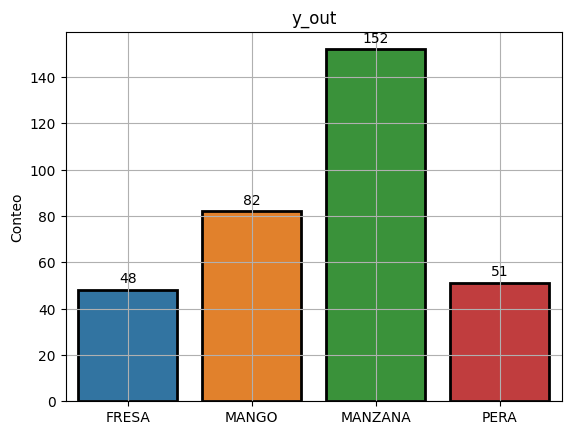

In [ ]:
labels2 = ['FRESA', 'MANGO', 'MANZANA', 'PERA']

# Crear el gráfico de barras 
ax = sns.countplot(x=labels, linewidth=2, edgecolor='black')
ax.set_title('y_out')
ax.set_xlabel('')
ax.set_ylabel('Conteo')
ax.set_xticklabels(labels2)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=10, xytext=(0, 8),
                textcoords='offset points')
plt.grid()
plt.show()


In [ ]:
# Imprimir información de las dimensiones
forma = images.shape
print("Número de imágenes:", forma[0])
print("Dimensiones de cada imagen:", forma[1], "x", forma[2])
print("Número de canales:", forma[3])


Número de imágenes: 333
Dimensiones de cada imagen: 64 x 64
Número de canales: 3


## Aplicando Train-Test Split

In [14]:
# Normalizamos
images_norm = images/np.linalg.norm(255.0)

#Conversión en array
images_norm = np.array(images_norm)
labels = np.array(labels)

#Separación de la base de datos
# X_train contiene los datos del vector de vectores, del mismo tamaño que y_train
# Y_train contiene las clases a las que pertenecen (Key)
x_train, x_test, y_train, y_test = train_test_split(images_norm, labels, test_size=0.3, random_state=42)

print("Tamaño de X para el entrenamiento", x_train.shape);
print("Tamaño de Y para el entrenamiento", y_train.shape);
print("Tamaño de X para prueba ", x_test.shape);
print("Tamaño de Y para prueba ", y_test.shape);


Tamaño de X para el entrenamiento (233, 64, 64, 3)
Tamaño de Y para el entrenamiento (233,)
Tamaño de X para prueba  (100, 64, 64, 3)
Tamaño de Y para prueba  (100,)


---

# Redes Convolucionales 1 -  usando una arquitectura **Personalizada**

Utiliza una arquitectura personalizada definida manualmente utilizando capas de Keras.
La red convolucional consta de capas convolucionales, capas de MaxPooling, una capa Flatten, capas densas y una capa de salida.

In [ ]:
# Capa de entrada
inputs = tf.keras.Input(shape=(64, 64, 3), name="input_1")  

# Capas Convolucionales y de Maxpoolin,junto con BatchNormalization
layers = tf.keras.layers.Conv2D(90, (3, 3), activation="relu")(inputs)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.MaxPool2D((2, 2))(layers)

layers = tf.keras.layers.Conv2D(60, (3, 3), activation="relu")(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.MaxPool2D((2, 2))(layers)

layers = tf.keras.layers.Conv2D(30, (3, 3), activation="relu")(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.MaxPool2D((2, 2))(layers)

# Capas densas adicionales antes de la salida
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Flatten()(layers)
layers = tf.keras.layers.Dense(64, activation="relu")(layers)
layers = tf.keras.layers.Dense(32, activation="relu")(layers)
layers = tf.keras.layers.Dense(16, activation="relu")(layers)
layers = tf.keras.layers.Dropout(0.2)(layers)

# Capa de salida
predictions = tf.keras.layers.Dense(4, activation="softmax", name="output_1")(layers)

# Build del modelo
model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.summary()

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir el callback para guardar el mejor modelo
file_path = ruta + "/MODELOS_CNN/ModeloCNN.h5"
checkpoint = k.callbacks.ModelCheckpoint(filepath=file_path, monitor="val_accuracy", mode="max", save_best_only=True)

# Entrenar el modelo
model.fit(x_train, y_train, epochs=100,  batch_size=32, verbose=1, validation_data=(x_test, y_test), callbacks=[checkpoint])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 90)        2520      
                                                                 
 batch_normalization_4 (Batc  (None, 62, 62, 90)       360       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 90)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 60)        48660     
                                                                 
 batch_normalization_5 (Batc  (None, 29, 29, 60)       240 

## Cargando el modelo

{'loss': 1.098528265953064, 'accuracy': 0.8899999856948853} 




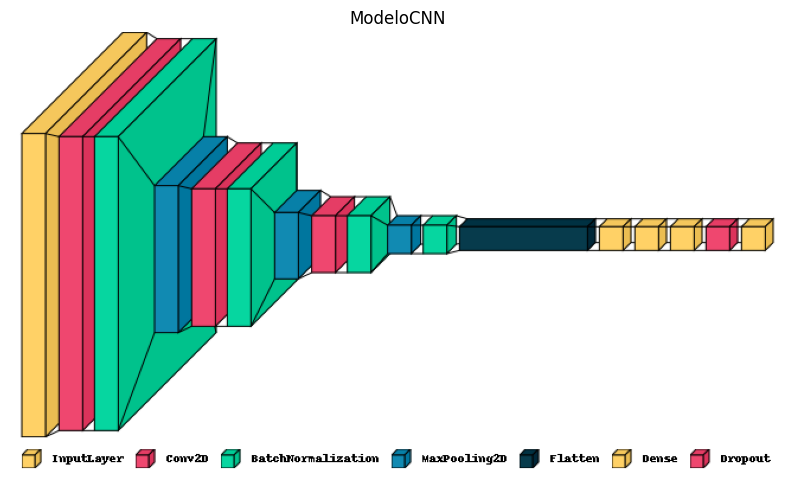

In [40]:
model1 = k.models.load_model(ruta + "/MODELOS_CNN/ModeloCNN.h5")

# make predictions on the test set
y_pred = model1.predict(x_test, verbose=0)

# Metricas
metrics = model1.evaluate(x_test, y_test, verbose=0)
results = {k: v for k, v in zip(model1.metrics_names, metrics)}
print(results,"\n\n")

# Graficando el modelo
vis_model = visualkeras.layered_view(model1, legend=True)
fig, ax = plt.subplots(figsize=(10, 15))  # Ajusta el tamaño de la figura según tus necesidades
ax.imshow(vis_model)
ax.set_title("ModeloCNN")
ax.axis("off")
plt.show()


## Métricas de desempeño

In [ ]:
# Obtener las etiquetas predichas
y_pred_classes = np.argmax(y_pred, axis=1)

print("y_test\n", y_test)
print("\ny_pred_classes\n", y_pred_classes)

y_test
 [0 3 1 2 1 3 2 2 2 2 1 0 3 1 2 2 1 2 1 2 1 2 3 2 0 1 2 3 2 3 2 3 1 1 2 3 2
 2 0 1 0 0 2 2 1 1 2 0 1 3 1 2 2 0 1 2 0 1 2 2 3 3 2 0 1 3 1 2 1 3 0 0 2 3
 2 2 1 1 2 2 1 2 2 1 3 2 0 3 2 2 2 3 2 1 1 0 0 2 1 0]

y_pred_classes
 [0 3 1 2 1 3 2 2 2 2 1 0 3 2 2 2 1 2 1 2 1 2 2 2 0 1 2 3 2 3 2 3 1 2 2 3 2
 3 0 1 0 3 2 2 2 1 2 0 1 0 1 2 2 0 1 2 0 1 1 2 3 3 2 0 1 3 1 2 1 3 0 0 2 3
 2 2 2 1 2 2 1 2 2 1 3 2 0 3 2 2 0 3 2 1 1 1 0 2 1 0]


Accuracy:  0.89
Precision:  0.8907809523809525
Recall:  0.89
F1:  0.8898217636022514
Error:  0.10999999999999999


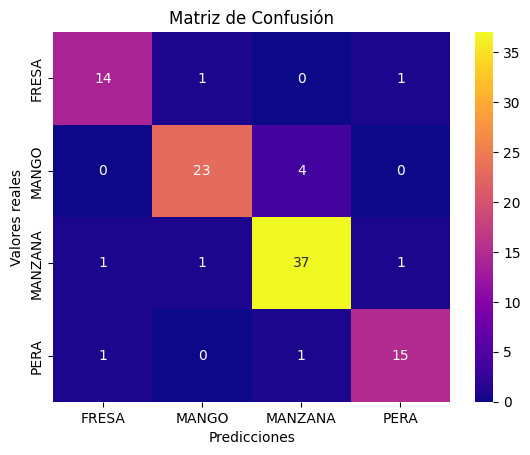

In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall= recall_score(y_test, y_pred_classes, average='weighted')
f1= f1_score(y_test, y_pred_classes, average='weighted')
error=1-accuracy

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("Error: ", error)

#Grafica Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='plasma')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Valores reales')
ax.xaxis.set_ticklabels(['FRESA', 'MANGO', 'MANZANA', 'PERA'])
ax.yaxis.set_ticklabels(['FRESA', 'MANGO', 'MANZANA', 'PERA'])
plt.show()


## Distribución de los resultados

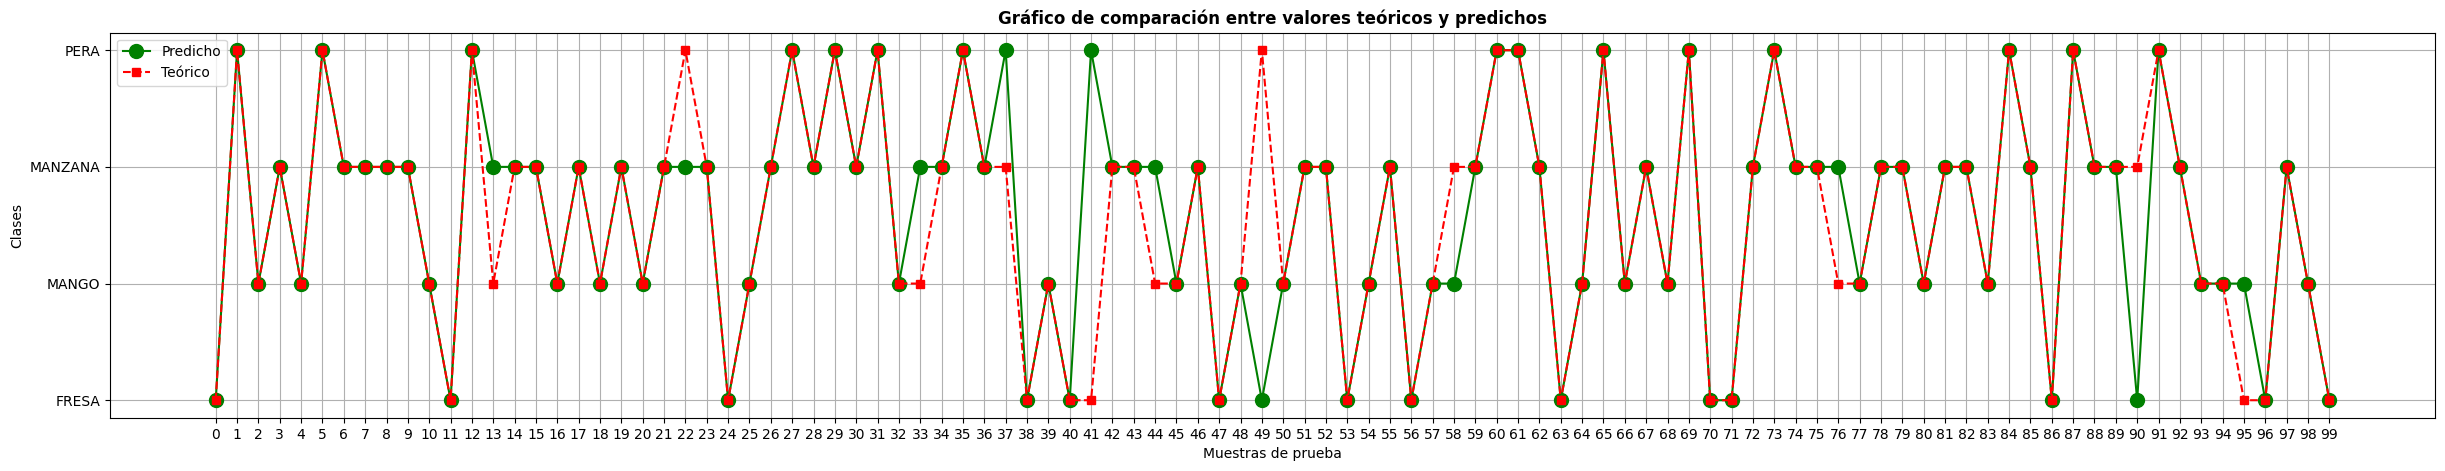

In [ ]:
plt.subplots(figsize=(30, 5))
plt.plot(y_pred_classes , label='Predicho', marker='o', markersize=10, linestyle='-', color='g')
plt.plot(y_test, label='Teórico', marker='s', markersize=6, linestyle='--', color='r')

plt.yticks(np.arange(4), ['FRESA', 'MANGO', 'MANZANA', 'PERA'])
plt.xticks(np.arange(len(y_test)))
plt.title('Gráfico de comparación entre valores teóricos y predichos', fontweight="bold")
plt.xlabel('Muestras de prueba')
plt.ylabel('Clases')
plt.legend(loc='upper left')
plt.grid()
plt.show()


---

# Redes Convolucionales 2 -  usando una arquitectura **ResNet152**

Utiliza una arquitectura predefinida de ResNet152 utilizando la API de aplicaciones de Keras.
La red utiliza una capa de Lambda para redimensionar las imágenes de entrada, seguida de la arquitectura de ResNet152, capas de Flatten y capas densas con dropout.

In [ ]:
# Crear el modelo de la red convolucional basado en ResNet152
res_model = k.applications.ResNet152(include_top=False, weights="imagenet", input_shape=(64, 64, 3))
model.summary()

model = k.models.Sequential()
model.add(k.layers.Lambda(lambda image: tf.image.resize(image, (64, 64))))
model.add(res_model) ##  la instancia de la red ResNet152 pre-entrenada cargada desde k.applications.ResNet152. Esta red incluye todas las capas convolucionales y de agrupamiento (pooling) de la arquitectura ResNet152 original.

# Capas adicionales
model.add(k.layers.BatchNormalization())  
model.add(k.layers.Flatten())
model.add(k.layers.Dense(64, activation='relu'))
model.add(k.layers.Dense(32, activation='relu'))
model.add(k.layers.Dense(16, activation='relu'))
model.add(k.layers.Dropout(0.2))

# Capa de salida
model.add(k.layers.Dense(4, activation='softmax'))

# Construir el modelo
model.build(input_shape=(None, 64, 64, 3))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
model.summary()

# Definir el callback para guardar el mejor modelo
file_path = ruta + "/MODELOS_CNN/ModeloResnet152.h5"
checkpoint = k.callbacks.ModelCheckpoint(filepath=file_path, monitor="val_accuracy", mode="max", save_best_only=True)

# Entrenar el modelo
model.fit(x_train, y_train, epochs=100,  batch_size=32, verbose=1, validation_data=(x_test, y_test), callbacks=[checkpoint])


Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

## Cargando el modelo

{'loss': 1.414616584777832, 'accuracy': 0.5199999809265137} 




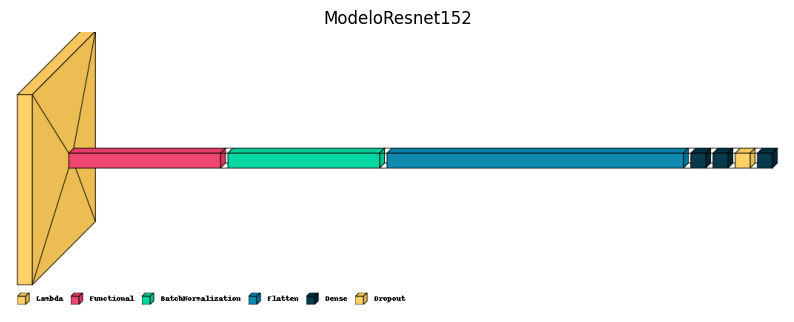

In [42]:
model2 = k.models.load_model(ruta + "/MODELOS_CNN/ModeloResnet152.h5")

# make predictions on the test set
y_pred = model2.predict(x_test, verbose=0)

# Metricas
metrics = model2.evaluate(x_test, y_test, verbose=0)
results = {k: v for k, v in zip(model2.metrics_names, metrics)}
print(results, "\n\n")

# Graficando el modelo
vis_model = visualkeras.layered_view(model2, legend=True)
fig, ax = plt.subplots(figsize=(10, 15))  # Ajusta el tamaño de la figura según tus necesidades
ax.imshow(vis_model)
ax.set_title("ModeloResnet152")
ax.axis("off")
plt.show()


## Métricas de desempeño

In [ ]:
# Obtener las etiquetas predichas
y_pred_classes = np.argmax(y_pred, axis=1)

print("y_test\n", y_test)
print("\ny_pred_classes\n", y_pred_classes)

y_test
 [0 3 1 2 1 3 2 2 2 2 1 0 3 1 2 2 1 2 1 2 1 2 3 2 0 1 2 3 2 3 2 3 1 1 2 3 2
 2 0 1 0 0 2 2 1 1 2 0 1 3 1 2 2 0 1 2 0 1 2 2 3 3 2 0 1 3 1 2 1 3 0 0 2 3
 2 2 1 1 2 2 1 2 2 1 3 2 0 3 2 2 2 3 2 1 1 0 0 2 1 0]

y_pred_classes
 [2 2 1 2 1 3 2 2 2 2 1 2 3 3 2 2 1 3 1 2 1 2 2 2 2 1 2 3 3 2 2 3 2 1 2 3 3
 3 3 1 3 3 2 2 1 2 2 2 1 2 1 2 2 2 1 2 2 1 2 2 3 3 3 2 1 3 2 2 1 3 3 2 2 3
 2 2 2 1 2 2 1 3 2 1 2 2 2 3 2 2 2 3 2 1 1 1 3 2 1 3]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.68
precision:  0.6013993311036789
recall:  0.68
f1:  0.6303950310559006
error:  0.31999999999999995


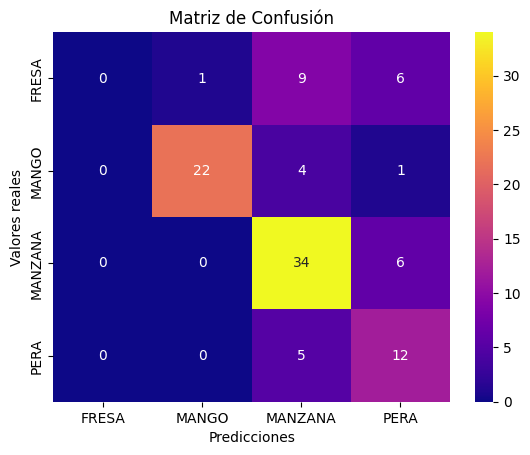

In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall= recall_score(y_test, y_pred_classes, average='weighted')
f1= f1_score(y_test, y_pred_classes, average='weighted')
error=1-accuracy

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("Error: ", error)

#Grafica Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='plasma')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Valores reales')
ax.xaxis.set_ticklabels(['FRESA', 'MANGO', 'MANZANA', 'PERA'])
ax.yaxis.set_ticklabels(['FRESA', 'MANGO', 'MANZANA', 'PERA'])
plt.show()


## Distribución de los resultados

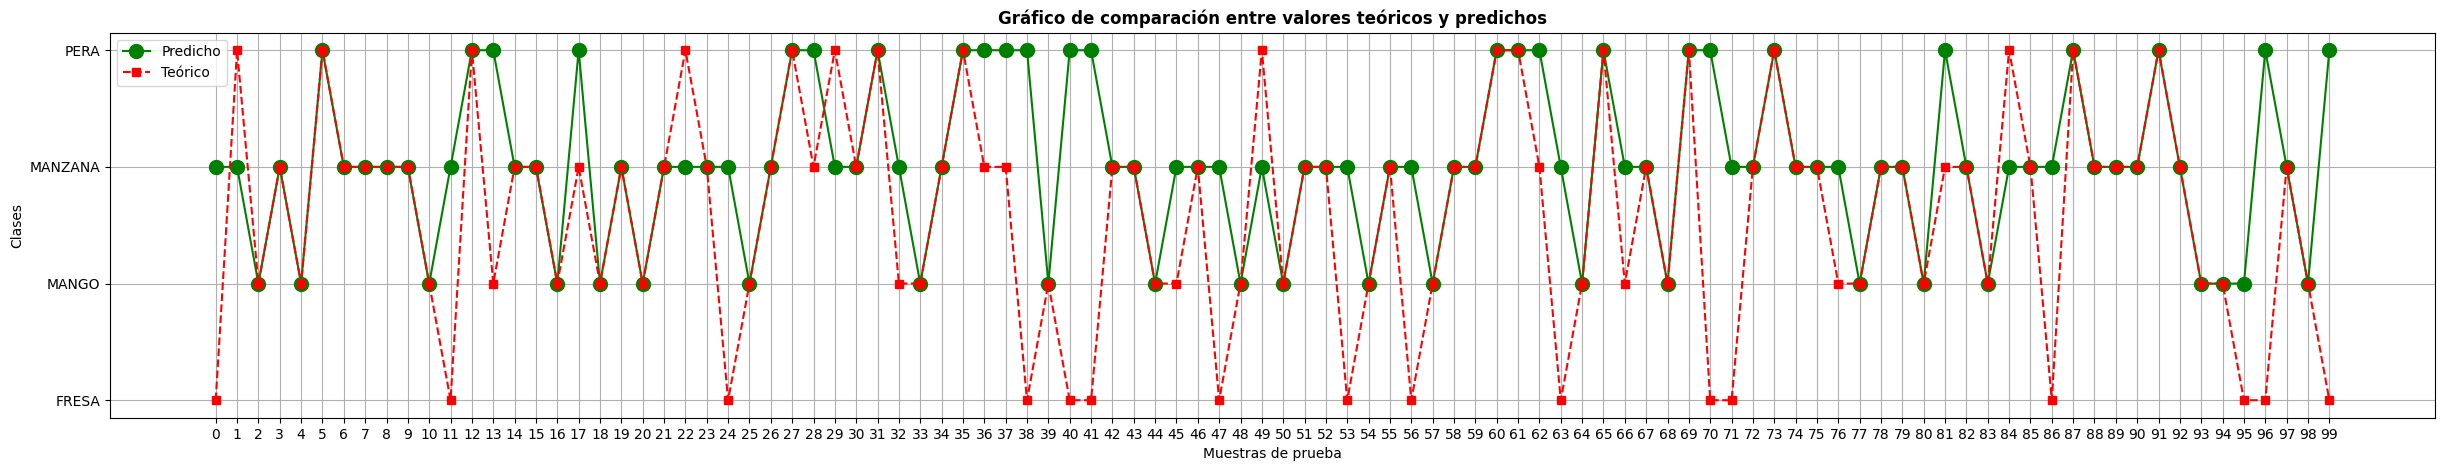

In [ ]:
plt.subplots(figsize=(30, 5))
plt.plot(y_pred_classes , label='Predicho', marker='o', markersize=10, linestyle='-', color='g')
plt.plot(y_test, label='Teórico', marker='s', markersize=6, linestyle='--', color='r')

plt.yticks(np.arange(4), ['FRESA', 'MANGO', 'MANZANA', 'PERA'])
plt.xticks(np.arange(len(y_test)))
plt.title('Gráfico de comparación entre valores teóricos y predichos', fontweight="bold")
plt.xlabel('Muestras de prueba')
plt.ylabel('Clases')
plt.legend(loc='upper left')
plt.grid()
plt.show()


---

# Haciendo pruebas individuales

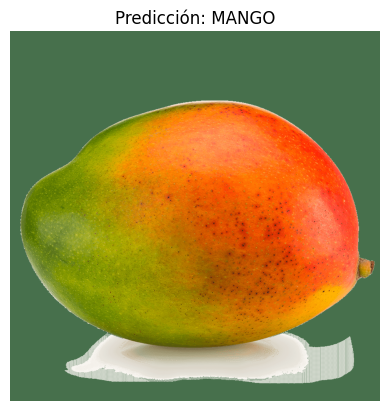

In [ ]:
# Leer la imagen de prueba
image = cv.imread(ruta +'/ImagenesPrueba/imagenPrueba.jpg')

image_gaussian = cv.GaussianBlur(image, (3, 3), 0)
image_resized = cv.resize(image_gaussian, (64, 64), interpolation=cv.INTER_AREA)
image_resized = np.expand_dims(image_resized, axis=0)
image_norm = image_resized / np.linalg.norm(255.0)

predictions = model1.predict(image_norm, verbose=0)
fruits = ['FRESA', 'MANGO', 'MANZANA', 'PERA']
predicted_class_index = np.argmax(predictions)
predicted_class = fruits[predicted_class_index]
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicción: ' + predicted_class)
plt.show()
